<a href="https://colab.research.google.com/github/Beatriz-Paes/Projeto-P-D-UEA-IA/blob/main/Projeto_P%26D_UEA_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydot
import graphviz
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from ipywidgets import interactive
from IPython.display import SVG, display
from graphviz import Source

In [ ]:
iris = pd.read_csv("iris.csv")

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print("Informações do Dataset:")
iris.info()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("Descrição do Dataset")
iris.describe()

Descrição do Dataset


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("Distribuição das espécies de Iris")
iris.groupby('Class').size()

Distribuição das espécies de Iris


Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

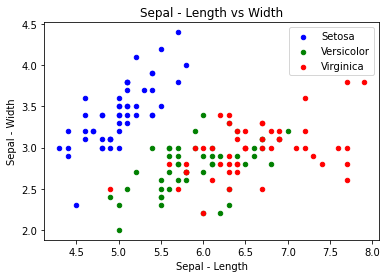

In [ ]:
fig = iris[iris.Class == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color="blue", label="Setosa")
iris[iris.Class == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Class == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Sepal - Length')
fig.set_ylabel('Sepal - Width')
fig.set_title('Sepal - Length vs Width')

plt.show()

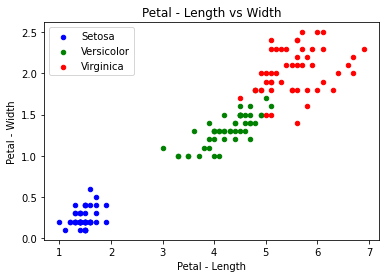

In [ ]:
fig = iris[iris.Class == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color="blue", label="Setosa")
iris[iris.Class == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Versicolor', ax=fig)
iris[iris.Class == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Petal - Length')
fig.set_ylabel('Petal - Width')
fig.set_title('Petal - Length vs Width')

plt.show()

In [ ]:
x = np.array(iris.drop(['Class'], 1))
y = np.array(iris['Class'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f'São {x_train.shape[0]} dados para treinamento e {y_test.shape[0]} dados para teste.')

São 120 dados para treinamento e 30 dados para teste.


In [ ]:
algoritmo = DecisionTreeClassifier()
algoritmo = algoritmo.fit(x_train, y_train)
y_pred = algoritmo.predict(x_test)
print(f'Precisão do modelo: {algoritmo.score(x_train, y_train) * 100}')

Precisão do modelo: 100.0


In [ ]:
algoritmo.feature_importances_

array([0.        , 0.02952996, 0.4497135 , 0.52075654])

In [ ]:
for feature, importance in zip(iris.columns, algoritmo.feature_importances_):
  print(f'{feature}: {importance}')

SepalLengthCm: 0.0
SepalWidthCm: 0.029529961599142673
PetalLengthCm: 0.44971349951554157
PetalWidthCm: 0.5207565388853158


In [ ]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



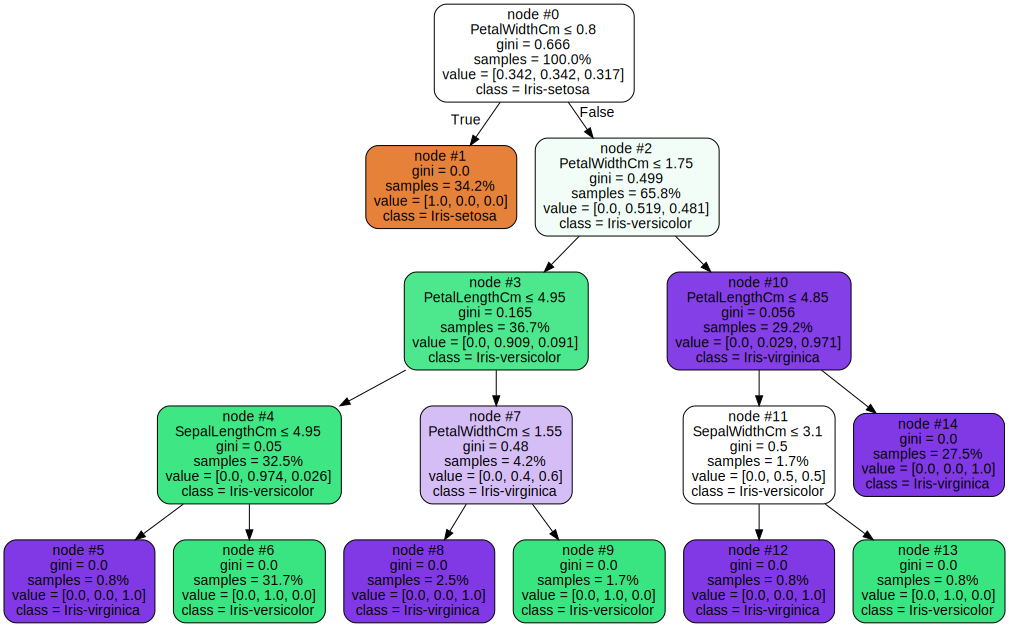

In [ ]:
dot_data = export_graphviz(algoritmo, out_file=None, feature_names=iris.drop(
    'Class',axis=1).columns,
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    filled=True, rounded=True, proportion=True, node_ids=True, rotate=False,
    label='all', special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
x, y = iris.drop('Class',axis=1), iris['Class']

features_label = iris.drop('Class',axis=1).columns

class_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(x, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1, 2, 3, 4, 5, 6, 7, 8, 10]
   , min_samples_split=(1, 5)
   , min_samples_leaf=(1, 5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [ ]:
x = iris[['PetalLengthCm','PetalWidthCm']].values
y = iris.Class.values

estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(x, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

Número de nós: 9


In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 iris.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


A arvore binária tem 9 nós e a seguinte estrutura: 

nó=0 (nó teste): vai para o nó 1 se o valor do atributo SepalWidthCm <= 0.800000011920929 
 se não, vai para o nó 2.
	nó=1 (nó folha).
	nó=2 (nó teste): vai para o nó 3 se o valor do atributo SepalWidthCm <= 1.75 
 se não, vai para o nó 6.
		nó=3 (nó teste): vai para o nó 4 se o valor do atributo SepalLengthCm <= 4.950000047683716 
 se não, vai para o nó 5.
			nó=4 (nó folha).
			nó=5 (nó folha).
		nó=6 (nó teste): vai para o nó 7 se o valor do atributo SepalLengthCm <= 4.8500001430511475 
 se não, vai para o nó 8.
			nó=7 (nó folha).
			nó=8 (nó folha).
